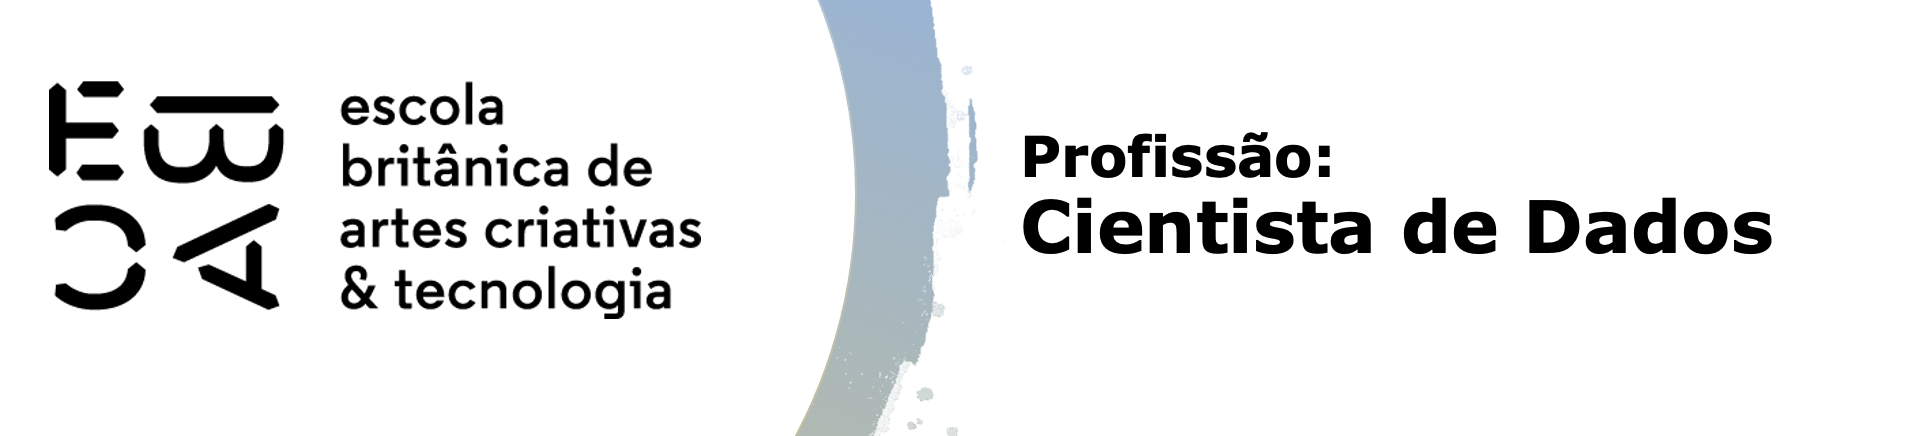

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
# Carregando a base features.txt em uma Series
# Eliminando a primeira linha e concatenando as duas primeiras colunas

features = pd.read_csv('features.txt',sep=" ", header=None)
features['Colunas'] = features[0].astype(str) + ' ' + features[1]
features = features.iloc[:,2:]
features = features.squeeze()
features.head()

0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
Name: Colunas, dtype: object

In [3]:
# Carregando a base subject_train.txt em uma Series

subject_train = pd.read_csv('subject_train.txt', sep =" ", header=None)
subject_train = subject_train.squeeze()
subject_train.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [4]:
# Carregando a base X_train.txt
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)

# Fazendo com que as colunas deste dataframe tenham os nomes indicados em features.txt
X_train.rename(columns=features, inplace=True)

# Sem alterar a ordem dos dataframes, colocando o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe**
X_train['Subject'] = subject_train

# Faça com que este dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
X_train.set_index('Subject',drop= True, append = True, inplace = True)


X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
subject_test = pd.read_csv('subject_test.txt', delimiter=' ', header=None)
subject_test = subject_test.squeeze()

X_test = (pd.read_csv('X_test.txt', header=None, names=features, delim_whitespace=True).assign(subject_test=subject_test))
X_test.set_index(keys='subject_test', drop=True, append=True, inplace=True)

X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [6]:
y_train = (pd.read_csv('y_train.txt', header=None).squeeze('columns'))
y_test = (pd.read_csv('y_test.txt', header=None).squeeze('columns'))

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [7]:
%%time

X_train_np = X_train[['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']]
X_test_np = X_test[['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']]



path = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).cost_complexity_pruning_path(X_train_np, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 0 ns
Wall time: 13.6 ms


array([0.00000000e+00, 6.43815742e-06, 6.59906426e-06, 8.26772494e-06,
       9.85633407e-06, 1.04385454e-05, 1.07972583e-05, 1.18205607e-05,
       1.25492253e-05, 2.00538489e-05, 2.04026115e-05, 2.06086985e-05,
       2.30817423e-05, 2.94533941e-05, 3.34812087e-05, 3.68012474e-05,
       4.68847891e-05, 4.71040159e-05, 5.07449569e-05, 5.87197700e-05,
       5.91842553e-05, 5.97128157e-05, 6.36454967e-05, 6.89360965e-05,
       6.93966379e-05, 7.54278366e-05, 7.96357451e-05, 8.02457230e-05,
       8.09934895e-05, 9.28372800e-05, 9.74328796e-05, 1.03837119e-04,
       1.24913948e-04, 1.27435359e-04, 1.33764496e-04, 1.35961757e-04,
       1.54565239e-04, 1.58686979e-04, 1.77825747e-04, 1.98255304e-04,
       2.05841756e-04, 2.12773371e-04, 2.16391334e-04, 2.38937546e-04,
       2.45372701e-04, 2.65773702e-04, 2.79807244e-04, 2.97474754e-04,
       3.01505259e-04, 3.02829336e-04, 3.16912071e-04, 3.16965951e-04,
       3.25678178e-04, 3.27800845e-04, 3.33730300e-04, 3.42285571e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [ ]:
%%time
clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf, 
                    param_grid=grid_parametros, 
                    cv=10, 
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

In [ ]:
print(grid.best_index_)
print(grid.best_score_)
print(grid.best_params_)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [ ]:
%%time
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), index=pd.Index(data=['Valor'], name='Parâmetro')).T, '\n')

print('Acurácia da árvore na base de testes:', clf.score(X=X_test, y=y_test), '\n')

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test)

plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [ ]:
 Calculando os acertos

acertos = [matriz[x, x] for x in range(6)] Varre a diagonal



# Calculando os erros

erros = sum(matriz) - acertos



# Criando um DataFrame para mostrar os resultados

df = pd.DataFrame(data={'acertos': acertos, 

                       'erros': erros}, 

                 index=pd.Index(data=list(range(1, 7)), 

                                name='classe')

                ).sort_values(by='erros', 

                              ascending=False)

In [36]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, max_depth=4).fit(X_train, y_train)
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis

53 tGravityAcc-min()-X                 0.283674
390 fBodyAccJerk-bandsEnergy()-1,16    0.254900
560 angle(Y,gravityMean)               0.166670
509 fBodyAccMag-energy()               0.138466
75 tGravityAcc-arCoeff()-Z,2           0.121762
                                         ...   
185 tBodyGyroJerk-entropy()-Z          0.000000
184 tBodyGyroJerk-entropy()-Y          0.000000
183 tBodyGyroJerk-entropy()-X          0.000000
182 tBodyGyroJerk-iqr()-Z              0.000000
561 angle(Z,gravityMean)               0.000000
Length: 561, dtype: float64

In [47]:
# Variáveis com maior importância
vars = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '560 angle(Y,gravityMean)']


In [38]:
X_train_np = X_train[['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '560 angle(Y,gravityMean)']]
X_test_np = X_test[['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '560 angle(Y,gravityMean)']]

path = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).cost_complexity_pruning_path(X_train_np, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.43621258e-06, 6.59906426e-06, 6.65079323e-06,
       8.57020268e-06, 1.13900758e-05, 1.18345542e-05, 1.58251025e-05,
       1.65530622e-05, 2.30817423e-05, 2.84988860e-05, 2.94533941e-05,
       3.19901575e-05, 3.88621172e-05, 4.71527022e-05, 5.07449569e-05,
       5.32966179e-05, 5.87197700e-05, 5.89560414e-05, 5.91842553e-05,
       5.95406071e-05, 7.20748845e-05, 7.96357451e-05, 8.02457230e-05,
       8.07092370e-05, 8.57501064e-05, 9.41898720e-05, 1.12050949e-04,
       1.15231709e-04, 1.17256388e-04, 1.35961757e-04, 1.53839028e-04,
       1.57089905e-04, 1.71454722e-04, 2.10262760e-04, 2.10826986e-04,
       2.23781025e-04, 2.36833627e-04, 2.40076491e-04, 2.41883178e-04,
       2.45372701e-04, 2.66998967e-04, 2.79807244e-04, 2.88909781e-04,
       2.97474754e-04, 3.09949363e-04, 3.16690616e-04, 3.18599930e-04,
       3.39245935e-04, 3.54071071e-04, 3.62028531e-04, 3.68605227e-04,
       3.78579953e-04, 3.93551983e-04, 3.98164316e-04, 4.13719623e-04,
      

In [39]:
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 6.43621258e-06, 6.59906426e-06, 6.65079323e-06,
        8.57020268e-06, 1.13900758e-05, 1.18345542e-05, 1.58251025e-05,
        1.65530622e-05, 2.30817423e-05, 2.84988860e-05, 2.94533941e-05,
        3.19901575e-05, 3.88621172e-05, 4.71527022e-05, 5.07449569e-05,
        5.32966179e-05, 5.87197700e-05, 5.89560414e-05, 5.91842553e-05,
        5.95406071e-05, 7.20748845e-05, 7.96357451e-05, 8.02457230e-05,
        8.07092370e-05, 8.57501064e-05, 9.41898720e-05, 1.12050949e-04,
        1.15231709e-04, 1.17256388e-04, 1.35961757e-04, 1.53839028e-04,
        1.57089905e-04, 1.71454722e-04, 2.10262760e-04, 2.10826986e-04,
        2.23781025e-04, 2.36833627e-04, 2.40076491e-04, 2.41883178e-04,
        2.45372701e-04, 2.66998967e-04, 2.79807244e-04, 2.88909781e-04,
        2.97474754e-04, 3.09949363e-04, 3.16690616e-04, 3.18599930e-04,
        3.39245935e-04, 3.54071071e-04, 3.62028531e-04, 3.68605227e-04,
        3.78579953e-04, 3.93551983e-04, 3.98164316e

In [40]:
%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_np, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 104 candidates, totalling 1040 fits
[CV 1/10; 1/104] START ccp_alpha=0.0............................................
[CV 1/10; 1/104] END .............ccp_alpha=0.0;, score=0.796 total time=   0.0s
[CV 2/10; 1/104] START ccp_alpha=0.0............................................
[CV 2/10; 1/104] END .............ccp_alpha=0.0;, score=0.810 total time=   0.0s
[CV 3/10; 1/104] START ccp_alpha=0.0............................................
[CV 3/10; 1/104] END .............ccp_alpha=0.0;, score=0.873 total time=   0.0s
[CV 4/10; 1/104] START ccp_alpha=0.0............................................
[CV 4/10; 1/104] END .............ccp_alpha=0.0;, score=0.766 total time=   0.0s
[CV 5/10; 1/104] START ccp_alpha=0.0............................................
[CV 5/10; 1/104] END .............ccp_alpha=0.0;, score=0.830 total time=   0.0s
[CV 6/10; 1/104] START ccp_alpha=0.0............................................
[CV 6

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.43621258e-06, 6.59906426e-06, 6.65079323e-06,
       8.57020268e-06, 1.13900758e-05, 1.18345542e-05, 1.58251025e-05,
       1.65530622e-05, 2.30817423e-05, 2.84988860e-05, 2.94533941e-05,
       3.19901575e-05, 3.88621172e-05, 4.715270...
       1.39447403e-03, 1.48587311e-03, 1.52178632e-03, 1.60234262e-03,
       1.60734613e-03, 1.96678382e-03, 2.11826404e-03, 2.12674961e-03,
       2.13251849e-03, 2.16385984e-03, 2.42923051e-03, 2.58529183e-03,
       3.23581373e-03, 3.76250065e-03, 4.80043229e-03, 5.47981355e-03,
       6.88407984e-03, 7.13824344e-03, 1.00771496e-02, 4.42597014e-02,
       6.33689986e-02, 1.09363718e-01, 1.67257720e-01, 1.86138242e-01])},
             verbose=100)

In [41]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010659,0.002455,0.001003,0.002111,0.0,{'ccp_alpha': 0.0},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
1,0.009473,0.003693,0.001367,0.003057,0.000006,{'ccp_alpha': 6.436212575154979e-06},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
2,0.010224,0.002423,0.000251,0.000514,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
3,0.008574,0.004507,0.001538,0.003003,0.000007,{'ccp_alpha': 6.6507932295240295e-06},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
4,0.010093,0.004104,0.000300,0.000641,0.000009,{'ccp_alpha': 8.570202676999486e-06},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.008129,0.004227,0.001069,0.002466,0.04426,{'ccp_alpha': 0.04425970139617491},0.736413,0.809783,0.798639,0.785034,0.755102,0.823129,0.831293,0.779592,0.780952,0.722449,0.782239,0.033961,100
100,0.008990,0.003597,0.001178,0.001904,0.063369,{'ccp_alpha': 0.06336899855231526},0.736413,0.774457,0.693878,0.629932,0.653061,0.782313,0.753741,0.779592,0.677551,0.700680,0.718162,0.052177,101
101,0.011335,0.002964,0.002135,0.003142,0.109364,{'ccp_alpha': 0.10936371763047262},0.543478,0.661685,0.546939,0.629932,0.653061,0.544218,0.544218,0.544218,0.677551,0.635374,0.598067,0.054854,102
102,0.009126,0.002665,0.003725,0.008017,0.167258,{'ccp_alpha': 0.16725771957779956},0.543478,0.546196,0.379592,0.545578,0.544218,0.544218,0.544218,0.376871,0.376871,0.376871,0.477811,0.081868,103


In [42]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

98
{'ccp_alpha': 0.010077149638744037}
0.8084865794143743


In [43]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp).fit(X_train_np, y_train)
clf.score(X_test_np, y_test)

0.7234475738038684

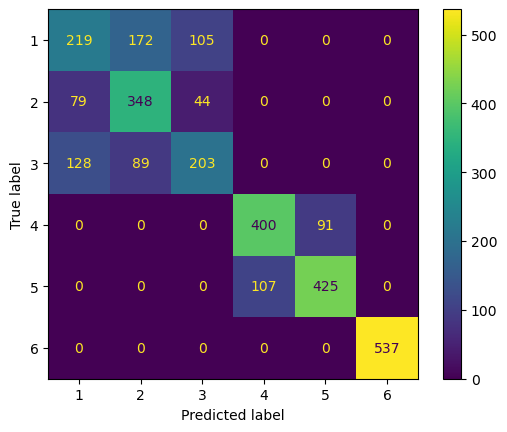

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_np, y_test)